In [219]:
import yfinance as yf
import pandas as pd

ticker = yf.Ticker('NFLX')  #PRX.AS ASML.AS
raw_df = ticker.history(start='2006-01-01', end="2022-07-01", interval="1d")
ticker.info["longName"]

'Netflix, Inc.'

In [220]:
def to_signal(returns):
    if returns >= 0.04:
        return 1
    return 0

In [221]:
raw_df['returnsM'] = raw_df[['Close']].pct_change(periods=30)
df = raw_df[['Open', 'High', 'Low', 'Close', 'Volume', 'returnsM']]
df['returnsM_shift'] = df['returnsM'].shift(periods=-30)
df['signal'] = df.apply(lambda r: to_signal(r['returnsM_shift']), axis=1)
df.drop(columns=['returnsM', 'returnsM_shift'], inplace=True)

/tmp/ipykernel_431630/4174264597.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returnsM_shift'] = df['returnsM'].shift(periods=-30)


In [222]:
from ta import add_all_ta_features
from ta.utils import dropna

# Clean NaN values
df = df.dropna()
df

,Open,High,Low,Close,Volume,signal
Date,,,,,,
2006-01-03,3.865714,3.874286,3.588571,3.721429,15659700,0
2006-01-04,3.642857,3.680000,3.517143,3.571429,15950200,0
2006-01-05,3.552857,3.578571,3.535714,3.561429,8123500,0
2006-01-06,3.560000,3.648571,3.547143,3.575714,8539300,0
2006-01-09,3.572857,3.607143,3.500000,3.571429,8081500,1
...,...,...,...,...,...,...
2022-06-24,183.500000,191.190002,181.839996,190.850006,12424000,0
2022-06-27,191.770004,191.779999,182.389999,189.139999,8363900,0
2022-06-28,189.199997,192.199997,179.369995,179.600006,7185400,0


In [223]:
# Add all ta features
df = add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume")

/home/mrrob0t/.local/lib/python3.10/site-packages/ta/trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/home/mrrob0t/.local/lib/python3.10/site-packages/ta/trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
/home/mrrob0t/.local/lib/python3.10/site-packages/ta/trend.py:938: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._psar_up = pd.Series(index=self._psar.index)
/home/mrrob0t/.local/lib/python3.10/site-packages/ta/trend.py:939: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._psar_down = pd.Series(index=self._psar.index)


In [224]:
df = df.fillna(method='backfill')
df = pd.concat([df[['Open', 'High', 'Low', 'Close', 'Volume', 'signal']], df.loc[:,df.columns.str.startswith('momentum')|df.columns.str.startswith('trend')]], join = 'outer', axis = 1)
#df = pd.concat([df[['Open', 'High', 'Low', 'Close', 'Volume', 'signal']], df.loc[:,df.columns.str.startswith('momentum')]], join = 'outer', axis = 1)
df

,Open,High,Low,Close,Volume,signal,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,...,momentum_wr,momentum_ao,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-03,3.865714,3.874286,3.588571,3.721429,15659700,0,0.014448,-0.022619,-0.009007,3.614286,...,-95.285339,-0.098315,-9.904045,0.387389,-0.617009,-0.246112,-6.265043,-14.368910,-5.997406,3.680000
2006-01-04,3.642857,3.680000,3.517143,3.571429,15950200,0,0.014448,-0.022619,-0.009007,3.614286,...,-95.285339,-0.098315,-9.904045,0.387389,-0.617009,-0.246112,-6.265043,-14.368910,-5.997406,3.680000
2006-01-05,3.552857,3.578571,3.535714,3.561429,8123500,0,0.014448,-0.022619,-0.009007,3.614286,...,-95.285339,-0.098315,-9.904045,0.387389,-0.617009,-0.246112,-6.265043,-14.368910,-5.997406,3.680000
2006-01-06,3.560000,3.648571,3.547143,3.575714,8539300,0,0.014448,-0.022619,-0.009007,3.614286,...,-95.285339,-0.098315,-9.904045,0.387389,-0.617009,-0.246112,-6.265043,-14.368910,-5.997406,3.680000
2006-01-09,3.572857,3.607143,3.500000,3.571429,8081500,1,0.014448,-0.022619,-0.009007,3.614286,...,-95.285339,-0.098315,-9.904045,0.387389,-0.617009,-0.246112,-6.265043,-14.368910,-5.997406,3.680000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-24,183.500000,191.190002,181.839996,190.850006,12424000,0,-7.712744,-9.962320,2.249576,180.591668,...,-38.352660,-5.865267,-3.907152,-4.061987,-5.118140,1.056153,-1.705491,-6.844764,5.139273,184.852730
2022-06-27,191.770004,191.779999,182.389999,189.139999,8363900,0,-6.584890,-9.286834,2.701944,179.450835,...,-42.320192,-3.911237,-6.749496,-3.468989,-4.788310,1.319321,-3.372927,-6.150397,2.777469,184.918273
2022-06-28,189.199997,192.199997,179.369995,179.600006,7185400,0,-6.387227,-8.706913,2.319685,178.353335,...,-64.454744,-1.832561,-6.831975,-3.378334,-4.506315,1.127981,-5.630798,-6.046477,0.415679,184.773614


## Remove unimportant features

In [225]:

df = df.loc[:,~df.columns.str.startswith('trend_vortex_') 
        & ~df.columns.str.startswith('trend_psar') & ~df.columns.str.startswith('trend_ichimoku') 
        & ~df.columns.str.startswith('momentum_ppo') & ~df.columns.str.startswith('momentum_stoch') 
        & ~df.columns.str.startswith('trend_aroon') & ~df.columns.str.startswith('momentum_wr') 
        & ~df.columns.str.startswith('trend_ema') & ~df.columns.str.startswith('momentum_ao')]


## Split data

In [226]:
class renamer():
    def __init__(self):
        self.d = dict()

    def __call__(self, x):
        if x not in self.d:
            self.d[x] = 0
            return x
        else:
            self.d[x] += 1
            return "%s_%d" % (x, self.d[x])

In [227]:
tmp = df.drop(columns=['signal'])
df = pd.concat([df, tmp.shift(), tmp.shift(2), tmp.shift(3), tmp.shift(4)], axis=1).dropna()
df = df.rename(columns=renamer())

In [228]:
train_df = df.loc[:'2016-07-01']
val_df = df.loc['2016-07-01':'2019-07-01']
test_df = df.loc['2019-07-01':'2022-07-01']
train_df

,Open,High,Low,Close,Volume,signal,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,...,trend_visual_ichimoku_a_4,trend_visual_ichimoku_b_4,momentum_rsi_4,momentum_tsi_4,momentum_uo_4,momentum_roc_4,momentum_pvo_4,momentum_pvo_signal_4,momentum_pvo_hist_4,momentum_kama_4
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-09,3.572857,3.607143,3.500000,3.571429,8081500,1,0.014448,-0.022619,-0.009007,3.614286,...,142.215106,141.180521,28.822201,-16.174566,52.229124,-9.904045,-6.265043,-14.368910,-5.997406,3.680000
2006-01-10,3.557143,3.635714,3.545714,3.632857,7893900,0,0.014448,-0.022619,-0.009007,3.614286,...,142.215106,141.180521,28.822201,-16.174566,52.229124,-9.904045,-6.265043,-14.368910,-5.997406,3.680000
2006-01-11,3.621429,3.692857,3.535714,3.550000,8747900,1,0.014448,-0.022619,-0.009007,3.614286,...,142.215106,141.180521,28.822201,-16.174566,52.229124,-9.904045,-6.265043,-14.368910,-5.997406,3.680000
2006-01-12,3.540000,3.690000,3.514286,3.674286,11428900,0,0.014448,-0.022619,-0.009007,3.614286,...,142.215106,141.180521,28.822201,-16.174566,52.229124,-9.904045,-6.265043,-14.368910,-5.997406,3.680000
2006-01-13,3.661429,3.697143,3.634286,3.651429,6004600,1,0.014448,-0.022619,-0.009007,3.614286,...,142.215106,141.180521,28.822201,-16.174566,52.229124,-9.904045,-6.265043,-14.368910,-5.997406,3.680000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-27,87.879997,88.000000,84.809998,85.330002,13730500,1,-2.019376,-0.896167,-1.123209,92.177501,...,94.144999,98.794998,36.861357,-6.835892,29.766927,-8.635404,-6.008947,-9.600058,3.591111,94.194269
2016-06-28,87.410004,88.879997,86.410004,87.970001,11545600,1,-2.173781,-1.151689,-1.022092,91.695834,...,94.144999,98.794998,34.936681,-10.278285,30.632769,-10.651177,-6.240648,-8.928176,2.687528,93.208273
2016-06-29,89.669998,91.970001,88.699997,91.059998,11687100,1,-2.023486,-1.326049,-0.697437,91.463334,...,94.144999,98.794998,40.563754,-11.627253,40.731040,-8.239059,-5.300126,-8.202566,2.902440,93.035022


## Normalize data

In [229]:
from sklearn.preprocessing import StandardScaler

def std_x_y(df):
    scaler = StandardScaler()
    X = df.drop(columns=['signal']).to_numpy()
    scaler.fit(X)
    X = scaler.fit_transform(X)
    Y = df['signal'].to_numpy()
    return X, Y

x_train, y_train = std_x_y(train_df)
x_val, y_val = std_x_y(val_df)
x_test, y_test = std_x_y(test_df)

## Train

In [230]:
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier

#clf = CatBoostClassifier(
#    iterations=3000, 
#    learning_rate=0.08,
#    #custom_loss=['AUC', 'Accuracy']
#)
#
#clf.fit(x_train, y_train, eval_set=[(x_val, y_val)], verbose=1000)


In [231]:
from lightgbm import LGBMClassifier

params = {
    'boosting_type': 'goss',
    'n_estimators': 10000,
    'learning_rate': 0.01,
    'num_leaves': 128,
    'max_depth': 24,
    'subsample_for_bin': 24000,
    'reg_alpha': 0.45,
    'reg_lambda': 0.48,
    'colsample_bytree': 0.5,
    'min_split_gain': 0.025,
    'subsample': 1
}

clf = LGBMClassifier(**params)

clf.fit(x_train, y_train, eval_set=[(x_val, y_val)], verbose=1000, early_stopping_rounds=2000)

/home/mrrob0t/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/mrrob0t/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	valid_0's binary_logloss: 0.888302
[2000]	valid_0's binary_logloss: 1.03017


LGBMClassifier(boosting_type='goss', colsample_bytree=0.5, learning_rate=0.01,
               max_depth=24, min_split_gain=0.025, n_estimators=10000,
               num_leaves=128, reg_alpha=0.45, reg_lambda=0.48, subsample=1,
               subsample_for_bin=24000)

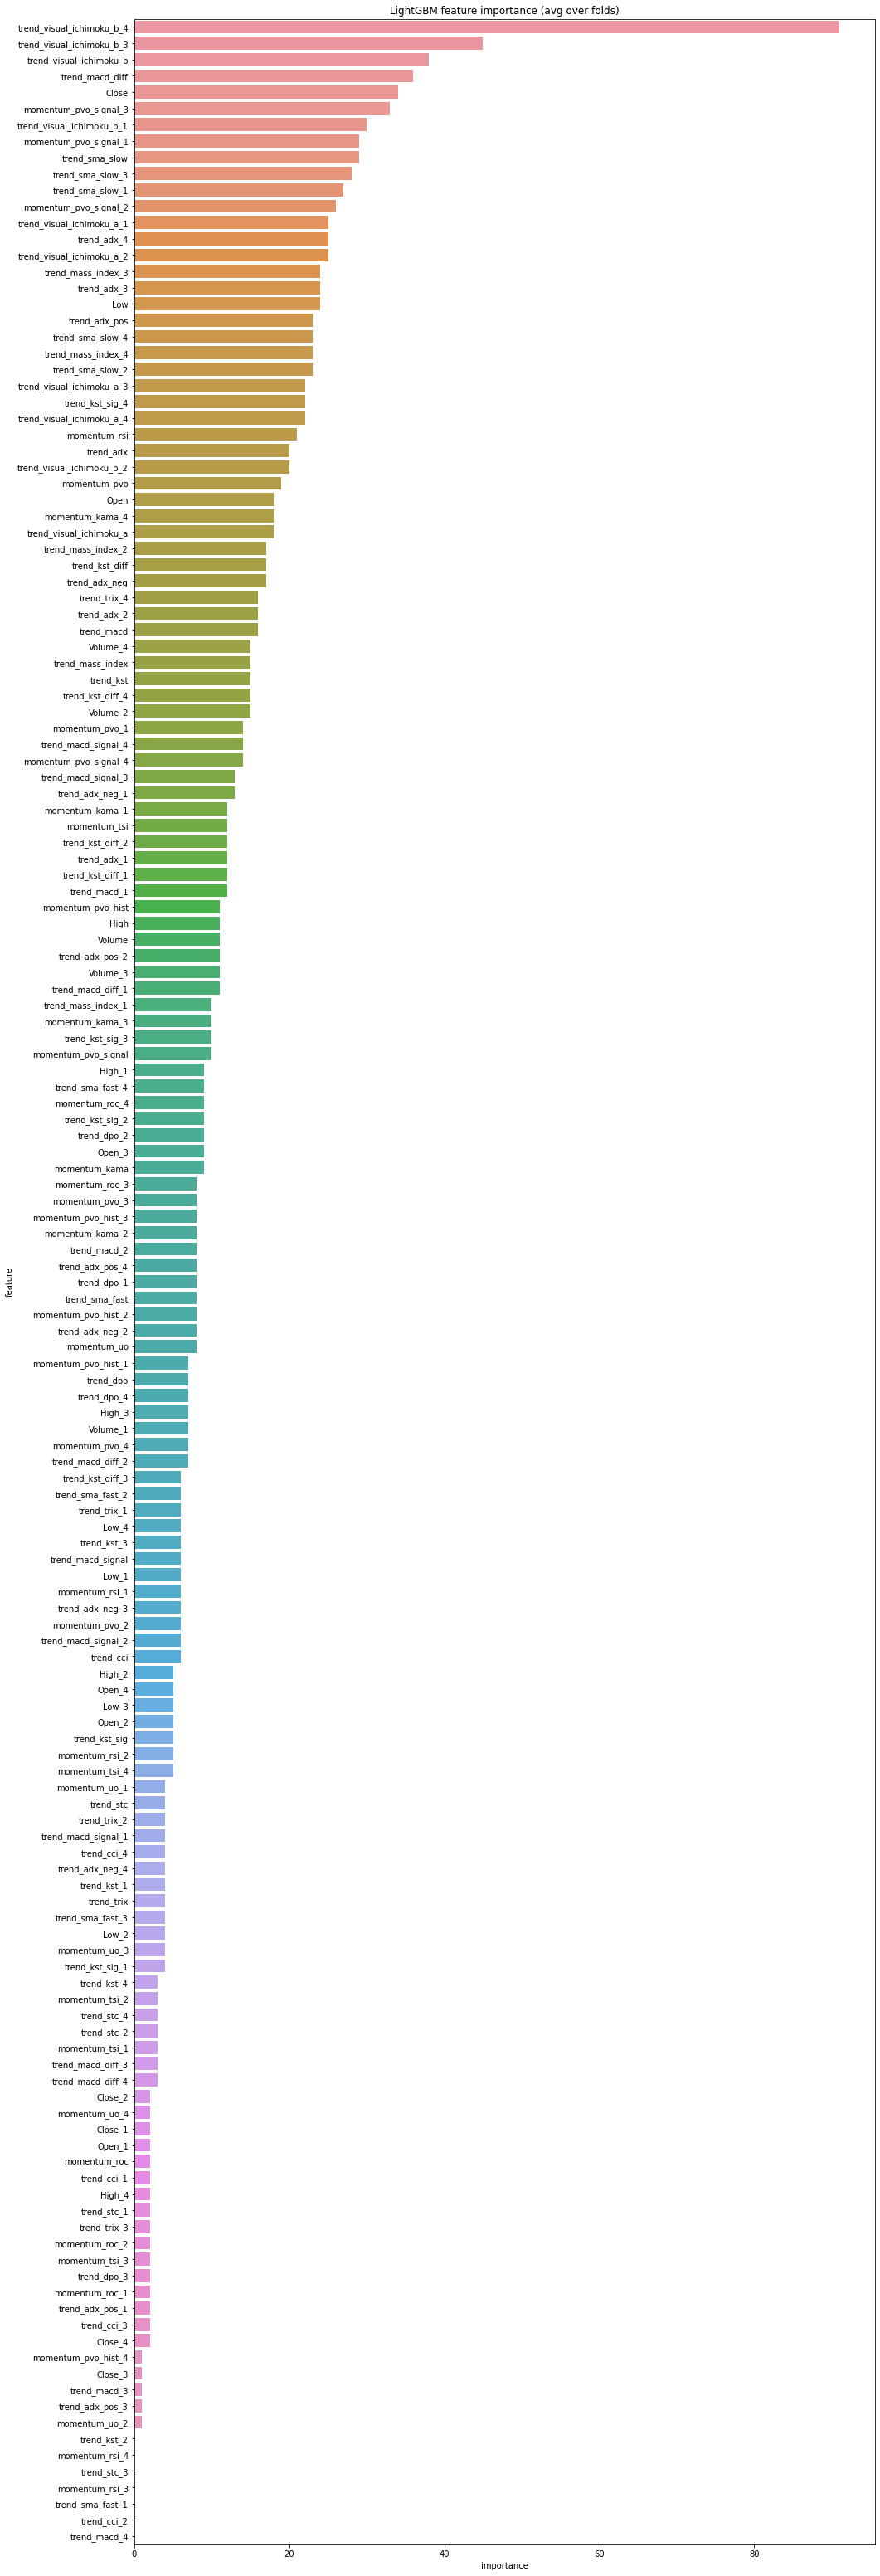

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns 

def plot_feat_importance(feat_importance_df,size=(16,56)):
    cols = feat_importance_df[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False).index
    best_features = feat_importance_df.loc[feat_importance_df.feature.isin(cols)]
    plt.figure(figsize=size)
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM feature importance (avg over folds)')

fold_importance = pd.DataFrame()
fold_importance["feature"] = train_df.drop(columns=['signal']).columns.to_list()
fold_importance["importance"] = clf.feature_importances_

plot_feat_importance(fold_importance)

In [233]:
cols = fold_importance[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False).index
best_features = fold_importance.loc[fold_importance.feature.isin(cols)]
best_features[best_features['importance']==0].sort_values(by="feature", ascending=False).tail(60)


,feature,importance
109,trend_stc_3,0
39,trend_sma_fast_1,0
129,trend_macd_4,0
75,trend_kst_2,0
82,trend_cci_2,0
147,momentum_rsi_4,0
116,momentum_rsi_3,0


In [234]:
test_df['signal_pred'] = clf.predict(x_test)

/tmp/ipykernel_431630/3157580224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['signal_pred'] = clf.predict(x_test)


## Backtest

In [235]:
import math

ini_capital = 10000
capital = ini_capital
shares = 0
hold_duration = 0
max_hold = 30

test_arr = test_df[['Close', 'signal_pred']].reset_index().to_numpy()

entry_price = 0
winers = 0
total = 0

for idx, data in enumerate(test_arr):
    date, price, sig = data[0].date(), data[1], data[2]

    if (capital + shares * price) < price:
        print('chapter 11')
        break

    if shares == 0 and sig == 1:
        quant = math.floor(capital/price)
        shares = quant
        capital = capital - shares * price
        entry_price = price

    if shares > 0:
        hold_duration += 1
        if hold_duration >= max_hold or idx == len(test_arr)-1:
            hold_duration = 0
            # sell
            capital = capital + shares * price
            shares = 0
            total += 1
            if price > entry_price:
                winers +=1
                entry_price = 0


print((capital-ini_capital)/ini_capital)
print('total trades: {}'.format(total))
print('win trades: {}'.format(winers))
print('win rate: {}'.format(winers/total))

-0.14307256622314454
total trades: 23
win trades: 15
win rate: 0.6521739130434783


## Benchmark

In [236]:
capital = ini_capital
test_arr = test_df[['Close', 'signal_pred']].reset_index().to_numpy()
capital = capital * (1 + (test_arr[len(test_arr)-1][1]-test_arr[0][1])/test_arr[0][1])
print((capital-ini_capital)/ini_capital)

-0.5331820815057207
